# 2. Lists and Sequences

a) Write a python function `fibvar(n)` which for $n>1$ returns a list of integer numbers $f_0, \ldots, f_n$ constructed according to the following rules:

\begin{align}
f_0 &= 1 \\
f_1 &= 1 \\
f_k &= \begin{cases} f_{k-2} + f_{k-1} & \text{for $k>1$ even}\\
f_{k-3} + f_{k-2} + f_{k-1} & \text{for $k>1$ odd}
\end{cases}
\end{align}

(2 marks)

In [4]:
def fibvar(n):
    f0 = 1
    f1 = 1
    
    res = [f0, f1]
    
    for i in range(2, n+1):
        if i%2 == 0:
            fk = res[-2] + res[-1]
        else:
            fk = res[-3] + res[-2] + res[-1]
        res.append(fk)
    
    return res

In [5]:
assert(fibvar(1) == [1,1])

b) Write a python function `expvar(l)`, which for a given list $l = (l_0, \ldots, l_n)$ returns the number `q` calculated as 
\begin{equation}
q = \sum_{k=0}^n \frac{l_k}{k!}.
\end{equation}
(1 marks)

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
def expvar(l):
    q = 0
    for i in range(0, len(l)):
        q += l[i] / np.math.factorial(i)
    return q

In [11]:
np.testing.assert_allclose(expvar([1,1]),2.0)

c) determine the limit of `expvar(fibvar(n))` for large `n`.  Assign the result to the python variable `limit`. How large do you need to choose `n`, until you see no further change up to machine accuracy? Assign this value of `n` to the python variable `n_min`. (2 marks) 

In [21]:
res = []
for i in range(1, 1000):
    res.append(expvar(fibvar(i)))

In [22]:
res

[2.0,
 3.0,
 3.6666666666666665,
 3.9166666666666665,
 4.016666666666667,
 4.041666666666667,
 4.048809523809524,
 4.05014880952381,
 4.050446428571429,
 4.050491071428572,
 4.050499188311688,
 4.050500202922078,
 4.050500359015984,
 4.050500375740331,
 4.050500377970244,
 4.050500378179298,
 4.050500378203893,
 4.0505003782059426,
 4.050500378206158,
 4.050500378206174,
 4.050500378206176,
 4.050500378206176,
 4.050500378206176,
 4.050500378206176,
 4.050500378206176,
 4.050500378206176,
 4.050500378206176,
 4.050500378206176,
 4.050500378206176,
 4.050500378206176,
 4.050500378206176,
 4.050500378206176,
 4.050500378206176,
 4.050500378206176,
 4.050500378206176,
 4.050500378206176,
 4.050500378206176,
 4.050500378206176,
 4.050500378206176,
 4.050500378206176,
 4.050500378206176,
 4.050500378206176,
 4.050500378206176,
 4.050500378206176,
 4.050500378206176,
 4.050500378206176,
 4.050500378206176,
 4.050500378206176,
 4.050500378206176,
 4.050500378206176,
 4.050500378206176,
 4.050

In [24]:
limit = 4.050500378206176
n_min = res.index(4.050500378206176)
print('limit:', limit, 'n_min:', n_min)

limit: 4.050500378206176 n_min: 20


In [25]:
assert(limit > 2.0 and limit<10)
assert(n_min >2 and n_min < 10000)

# 3. Approximation for $\pi$

Let us consider the following method of approximating $\pi$: 

- For a given $n\in \mathbb{N}$ draw $2n$ random numbers $x_0$ to $x_{n-1}$ and $y_0$ to $y_{n-1}$ all of which are uniformly distributed in the interval $[0,1]$. 
- Then for each index $i=\{0,\ldots,n-1\}$ check if $x_i^2 + y_i^2<1$.  
- Count the number of times that this condition is fulfilled, and denote this number by $k_n$. 
- The number $\pi$ can now be expressed as 
\begin{equation}
\pi = 4 \lim_{n \to \infty}\frac{k_n}{n}
\end{equation}


a) Write a python function `mc_pi(n)` which calculates and returns the value $4k_n/n$ according to the algorithm outlined above.  Test this routine by calculating `mc_pi(1000)`. How well does this approximate $\pi$? Calculate the relative error $\epsilon_{1000}$ for three different runs of `mc_pi(1000)`.  *Hint*: `np.random.random(n)` yields a (numpy) array of length `n` of uniformly $[0,1)$ distributed random numbers. (4 marks)

In [40]:
def mc_pi(n):
    x = np.random.random(n)
    y = np.random.random(n)

    k = 0
    for i in range(x.shape[0]):
        r = x[i]**2 + y[i]**2
        if r < 1:
            k += 1
    pi = 4 * (k/n)
    return pi

In [43]:
errors = []
n = 1000
for i in range(3):
    pi = mc_pi(n)
    errors.append(abs(np.pi - pi))

In [44]:
print(np.mean(errors), np.std(errors))

0.04080244880340237 0.019515459114505772


b) Now determine and print the relative error of `mc_pi(n)` for $n = 2^2, 2^3, 2^4, \ldots, 2^{22}$. (1 marks)

In [123]:
errors = []
ns = []
for i in range(2, 23):
    n = 2**i
    pi = mc_pi(n)
    errors.append(abs(np.pi - pi))
    ns.append(n)

In [124]:
print(np.mean(errors), np.std(errors))

0.17798809891692965 0.3836877210466143


c) Redo part (b), but instead of printing, now plot $\log(n)$ versus $\log \epsilon_n$ as red dots. (1 marks)

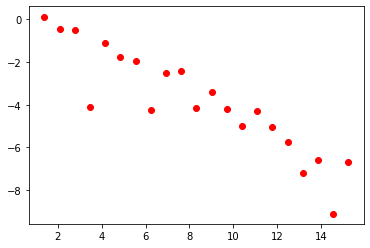

In [59]:
plt.scatter(np.log(ns), np.log(errors), color='red')

d) redo part (c), but now include include suitable lines to estimate the order of convergence of this method to calculate $\pi$. What order of convergence do you estimate? (2 marks)

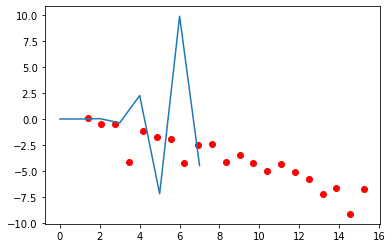

In [122]:
z = np.polyfit(np.log(ns), np.log(errors), 7)
plt.scatter(np.log(ns), np.log(errors), color='red')
plt.plot(z)

In [117]:
z

array([ 2.69389097e-05, -1.47752681e-03,  3.25450249e-02, -3.67774797e-01,
        2.25035089e+00, -7.17420546e+00,  9.85845957e+00, -4.47387203e+00])

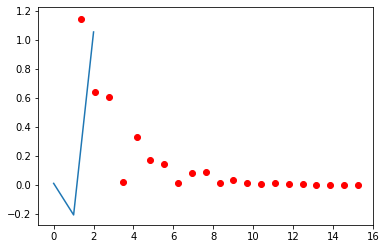

In [94]:
z = np.polyfit(np.log(ns), errors, 2)
plt.scatter(np.log(ns), errors, color='red')
plt.plot(z)

In [95]:
from scipy.optimize import curve_fit

In [108]:
def rate(x):
    e = [abs(x_ - np.pi) for x_ in x]
    q = [np.log(e[n+1]/e[n])/np.log(e[n]/e[n-1])
         for n in range(1, len(e)-1, 1)]
    return q

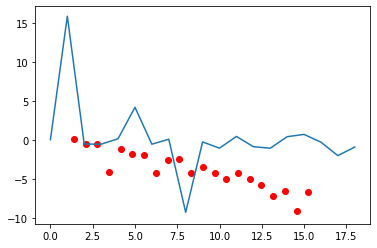

In [109]:
plt.plot(rate(errors))
plt.scatter(np.log(ns), np.log(errors), color='red')
plt.show()

In [120]:
np.polyfit(np.log(ns), np.log(errors), 1)

array([-0.51906794,  0.49102218])

<Figure size 432x288 with 0 Axes>

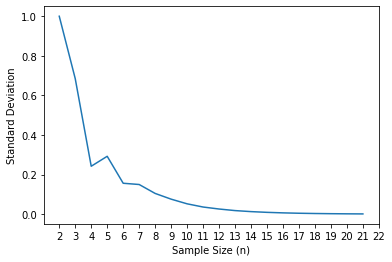

In [166]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
# sns.set(rc={'text.usetex' : True})


plt.clf()

# n = int(1e3)
n = 21
pi_estimate1 = np.full(n, np.nan)
pi_estimate2 = np.full(n, np.nan)
std1 = np.full(n, np.nan)
std2 = np.full(n, np.nan)
sample_size = 2 + np.arange(n)

for j in range(20):
    i = 2 ** (j+2)
    np.random.seed(i)
    u1 = np.random.uniform(size = i)
    u2 = np.random.uniform(size = i)
    x = u1**2 + u2**2

    darts = np.zeros(i)
    darts[x <= 1] = 1
    in_circle_proportion = np.mean(darts)
    pi_estimate1[j] = 4 * in_circle_proportion
    std1[j] = 4*np.std(darts)/np.sqrt(i)


plt.figure(figsize=(6, 4))
plt.plot(sample_size, std1)
plt.xlabel("Sample Size (n)")
plt.ylabel('Standard Deviation')
plt.xticks(range(2, 23))
plt.show()

In [156]:
sample_size

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])

In [157]:
2 + np.arange(n)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22])